<a href="https://colab.research.google.com/github/yagomsv/aulas_ciencia_de_dados_UFBA/blob/main/Aula_arvore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação prática de um modelo baseado em árvore

Está aplicação consitirá no desenvolvimento de um modelo de regressão basado em árvores utilizando o banco de dados [California Housing](https://www.kaggle.com/datasets/camnugent/california-housing-prices), para nos famialiarizarmos com os comandos básicos para essa funcionalidade com o [scikit- learn](https://scikit-learn.org/stable/index.html).



### Carregando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
from sklearn import tree

### Importando o banco de dados

O conjunto de dados utilizado nessa aplicação é disponibilizado no próprio ***scikit- learn*** em seu módulo ***sklearn.datasets*** e pode ser importando utilizando o seguinte comando:

In [2]:
california = sklearn.datasets.fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
#Imprimindo a descrição do banco de dados
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

California housing é um conjunto de dados públicos coletado durante o censu américano de 1990. As informações sobre as variáveis foram armazenadas por grupo de quarteirões. Em cada amostra armazenada no banco inclui, em média, 1.425,5 indivíduos que vivem em uma área demográfica compacta.

As variáveis preditoras contidas no conjunto são:
* MedInc: Mediana da Renda
* HouseAg: Mediana da Idade das casas
* AveRooms: Número médio de quartos por família
* AveBedrms: Número médio de banheiros por família
* Population: População
* AveOccup: Número médio de membros da família
* Latitude: Latitude
* Longitude: Longitude

A variável predita:
* Medianhousevalue: Valor médio da casa para distritos da Califórnia, expresso em centenas de milhares de dólares ($100.000).



In [4]:
X, y = california.data, california.target

In [5]:
X.shape

(20640, 8)

In [6]:
print(X)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(y)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [8]:
y.shape

(20640,)

In [9]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, 
                                                                            test_size = 0.2, 
                                                                            random_state = 42)

## Treinando o modelo de árvore de regressão

In [10]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(criterion = 'squared_error', max_depth= 3, min_samples_leaf = 3, 
                               max_features = 0.5, 
                               random_state = 42)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_features=0.5, min_samples_leaf=3,
                      random_state=42)

Explicando os hiperparâmetros do modelo:
- o *criterion* é a função que mede a qualidade da divisão (*split*) do modelo. Nesse caso utilizamos o erro quadrático.
- max_depth é máxima profundidade da árvore. Se o valor atribuido foi "None", então a árvore irá para de crescer quando todas as folhas forem puras.
- min_samples_leaf é o número mínimo de amostras necessárias para estar em um nó (folha), determina o número necessário de amostras em um nó para interromper o crescimento de seu ramo. Aumentar min_samples_leaf faz com que a árvore seja menos profundas, o que diminui a acurácia de cada folha individual, mas também potencialmente diminui a correlação entre elas, melhorando a generalização.
- max_features especifica um número máximo de variáveis a ser considerado para decidir o split de cada nó. Diminuir esse número máximo diminui o efeito de variáveis muito influentes, diminuindo assim a correlação entre os nós.
- random_state controla a aleatoriedade do estimador

**Desenhando a árvore do modelo anterior**

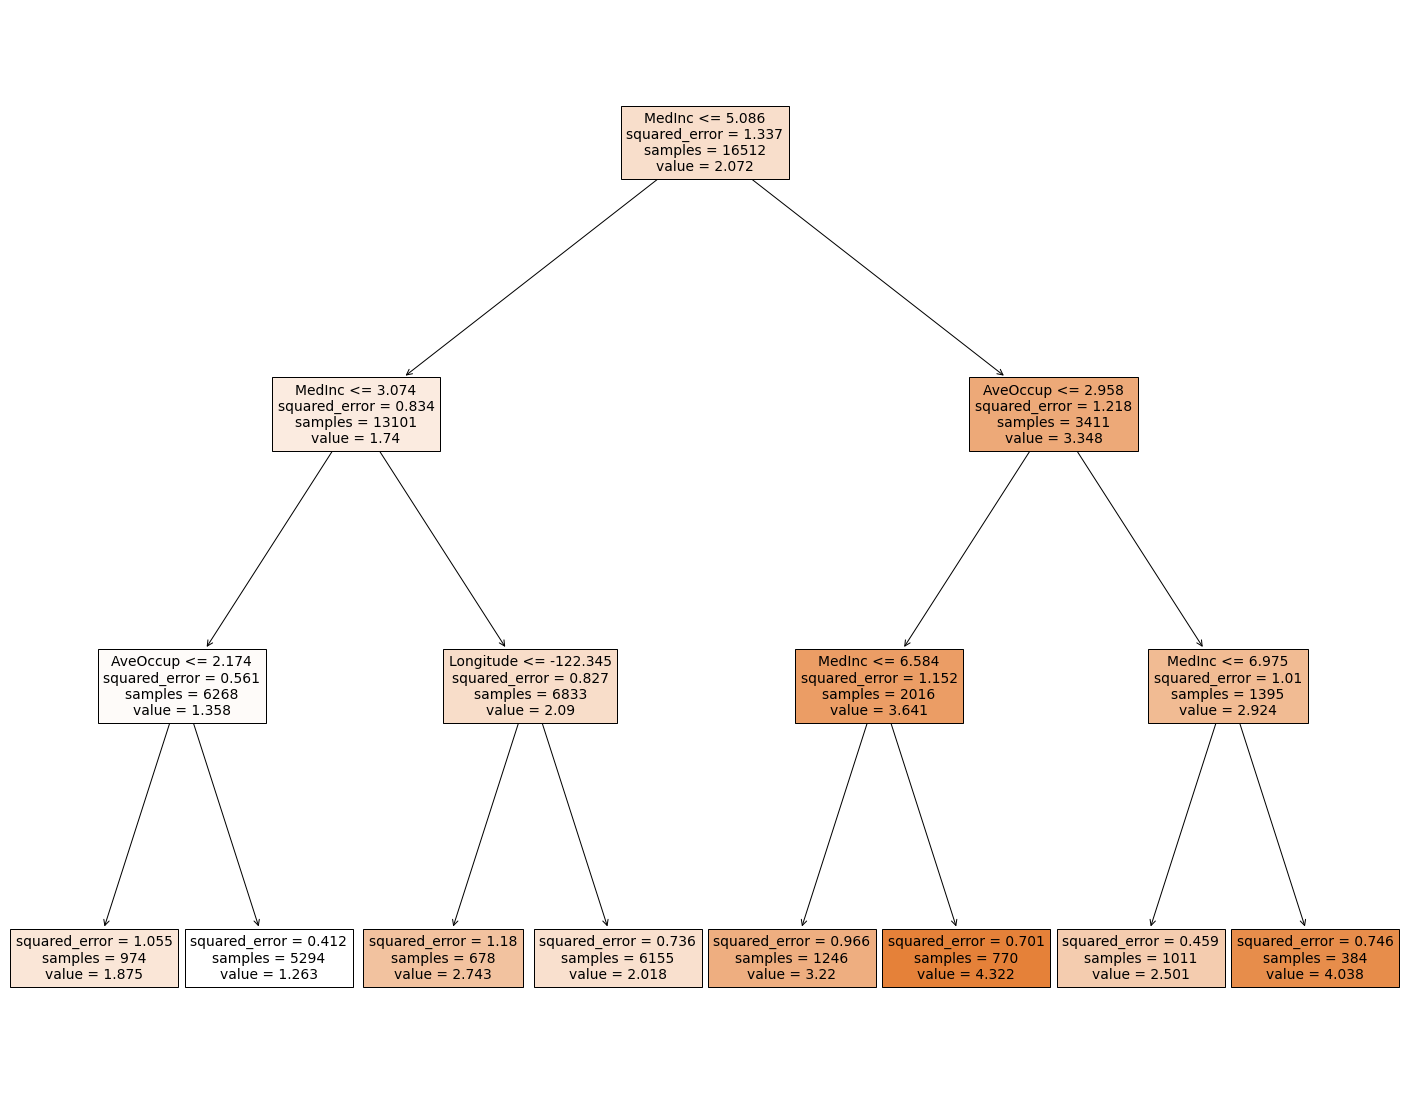

In [11]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(modelo, 
                   feature_names= california.feature_names,  
                   class_names= california.target_names,
                   filled=True)

No código acima estou usando a função filled = **True**. Quando esse parâmetro é usado com o valor **"True"** o método usa cores para indicar a classe quando estamos classificando e extremidade dos valores para regressão ou pureza do nó para saída múltipla.

## Testando o modelo

In [12]:
y_pred = modelo.predict(X_test)

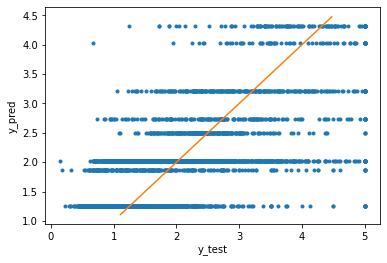

In [13]:
# plotando valores verdadeiros contra predições
plt.plot(y_test, y_pred,'.')

# plotando a reta x=y
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())

# legenda dos eixos
plt.xlabel('y_test')
plt.ylabel('y_pred');

In [14]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.6987560490610398
R2: 0.4667649102961322


## Encontrando o valor ideal de alfa (profundidade da árvore)

A função **.cost_complexity_pruning_path** do *scikit-learn* controla os hiperparâmetros do modelo **min_samples_leaf e max_depth**, a fim de evitar o *overfiting* do modelo.

In [15]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.7, random_state=0)

modelo = DecisionTreeRegressor(random_state=0)
path = modelo.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Impureza das folhas vs Valor de alfa para os dados de treinamento')

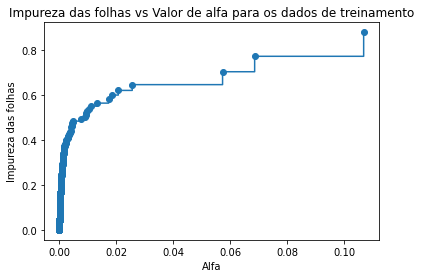

In [16]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Alfa")
ax.set_ylabel("Impureza das folhas")
ax.set_title("Impureza das folhas vs Valor de alfa para os dados de treinamento")

In [ ]:
modelos = []
for ccp_alpha in ccp_alphas:
    modelo = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    modelo.fit(X_train, y_train)
    modelos.append(modelo)
print(
    "O número de nós na última árvore é de: {} com ccp_alpha: {}".format(
        modelos[-1].tree_.node_count, ccp_alphas[-1]
    )
)

In [ ]:
modelos = modelos[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [modelo.tree_.node_count for modelo in modelos]
depth = [modelo.tree_.max_depth for modelo in modelos]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
train_scores = [modelo.score(X_train, y_train) for modelo in modelos]
test_scores = [modelo.score(X_test, y_test) for modelo in modelos]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Verificar aqui qual o melhor valor de alfa e simular e desenhar o modelo usando esse alfa.
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html?highlight=cost_complexity_pruning_path

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=cost_complexity_pruning_path#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path

https://scikit-learn.org/stable/modules/tree.html